In [1]:
import pickle, os
import sys
import numpy as np
import torch
import matplotlib.pyplot as plt
import pdb

%load_ext autoreload
%autoreload 2

In [2]:
sys.path.append('CONFIG_files/')

In [3]:
# import CONFIG_ICIMOD_06May2023 as CONFIG
# import CONFIG_WAPDA_BGMM as CONFIG
# import CONFIG_SUSHIWAT_BGMM as CONFIG
# import CONFIG_COMBINED_BGMM as CONFIG

# import CONFIG_ICIMOD_BGMM_23_JUNE_2023 as CONFIG
# import CONFIG_WAPDA_BGMM_23_JUNE_2023 as CONFIG
# import CONFIG_SUSHIWAT_BGMM_23_JUNE_2023 as CONFIG

# import CONFIG_COMBINED_BGMM_21_AUG_2023_EXP_3 as CONFIG

# import CONFIG_COMBINED_BGMM_21_AUG_2023_EXP_2 as CONFIG

# import CONFIG_WAPDA_BGMM_21_AUG_2023_EXP_4 as CONFIG
# import CONFIG_ICIMOD_BGMM_21_AUG_2023_EXP_4 as CONFIG
# import CONFIG_SUSHIWAT_BGMM_21_AUG_2023_EXP_4 as CONFIG


# import CONFIG_ICIMOD_BGMM_07_NOV_2023_EXP_1 as CONFIG
import CONFIG_COMBINED_BGMM_09_NOV_2023_EXP_2 as CONFIG


In [4]:
CONFIG.REGION

'COMBINED'

In [5]:
run_prefix = CONFIG.RUN_NAME

print(run_prefix)

with open(f'/data/hpcdata/users/marron31/_experiments/{run_prefix}/importance.pkl', 'rb') as handle:
    importance = pickle.load(handle)

COMBINED_BGMM_09_NOV_2023_EXP_2


In [6]:
def create_k_all_importance(importance, CONFIG):
    # Create importance for k_all
    for run in importance.keys():
        for k in range(len(CONFIG.params['k'])):
            if k == 0:
                importance[run]['k_all'] = {}
            
            for j in range(len(importance[run][f'k{k}'].keys())):
                if k==0: 
                    importance[run]['k_all'][f'{j:.0f}'] = importance[run][f'k{k}'][f'{j:.0f}']
                else:
                    importance[run]['k_all'][f'{j:.0f}'] = torch.concat([importance[run]['k_all'][f'{j:.0f}'],importance[run][f'k{k}'][f'{j:.0f}']])

In [7]:
create_k_all_importance(importance, CONFIG)

In [8]:
# importance['VGLM_[]_bgmm_B=128_D=0']['k_all']['0'].shape
# importance['VGLM_[]_bgmm_B=128_D=0']['k_all']['1'].shape
# importance['VGLM_[]_bgmm_B=128_D=0']['k_all']['2'].shape

In [9]:
# Colorblind-friendly color dictionary
color_dict = {
        0: '#E69F00',  # Orange
        1: '#56B4E9',  # Sky Blue
        2: '#1B02A3',  # Dark Blue
        3: '#F0E442',  # Yellow
        4: '#0072B2',  # Blue
        5: '#D55E00',  # Vermilion
        6: '#CC79A7',  # Reddish Purple
        7: '#999999',  # Grey
        # Add more colors if needed
    }

# color_dict = {
#     0: '#0072B2',  # Blue
#     1: '#E69F00',  # Orange
#     2: '#009E73',  # Green
# }

# color_dict = {
#     0: '#1B9E77',  # Teal
#     1: '#E69F00',  # Orange
#     2: '#56B4E9',  # Sky Blue
# }



In [13]:
# Helper method to print importances and visualize distribution

pi = '\u03C0'
alpha = '\u03B1'
beta = '\u03B2'

def visualize_importances(feature_names, attr, title=f"Average Feature Importances", plot=True, axis_title="Features", plot_error_bars=False, ax=None):
    
    attr = attr.detach().numpy()
    
    importances = np.mean(attr, axis=0)
    error_bars = np.stack([-np.quantile(attr, 0.1, axis=0),np.quantile(attr, 0.9, axis=0)])
                  
    feature_names = [x.split('_norris')[0] for x in feature_names]
    
    for i in range(len(feature_names)):
        pass
        #print(feature_names[i], ": ", f"{importances[i]:.3f} {error_bars[0,i]:.3f} {error_bars[1,i]:.3f}")
    x_pos = (np.arange(len(feature_names)))
    
    if plot:
        ax.figure(figsize=(18,4))
        if plot_error_bars:
            ax.bar(x_pos, importances,yerr=error_bars, align='center',capsize=10, color='black', ecolor='black', width=0.5)
        else:
            ax.bar(x_pos, importances,align='center',capsize=10, color='black',)    

        ax.xticks(x_pos, feature_names, wrap=False, rotation=90, fontsize=14)
        ax.xlabel(axis_title)
        ax.title(title)
        ax.grid()
#         plt.show()    
    
def plot_multiple_bars(importances, feature_names, title='Average feature importance per held out set (k=10)', legend_items=None, plot_x_labels=True, label=None, ax = None):
    
#     fig, axes = plt.subplots(3,1, figsize=(20,9))
    width = 1/len(importances)*0.7
    
#     feature_names = [x.split('_norris')[0] for x in feature_names]

    sorted_indices = np.array([14, 15, 1, 2, 3, 5, 4, 20, 7, 10, 11, 12, 13, 18, 19, 16, 17, 21, 22, 24, 23, 8, 9, 25, 26, 6]) - 1 

    unsorted_feature_names = [r'$DOY_{SIN}$', r'$DOY_{COS}$', '$Z$', '$X$', '$Y$', '$YEAR$', 
                              '$WVP$', '$RH_{2m}$', '$RH_{500}$', 
                              '$T_{2m}$', '$T_{2m,MAX}$', '$T_{2m,MIN}$', '$T_{2m,R}$', 
                              '$PRECIP$', '$RAIN$', 
                              '$U_{500}$', '$V_{500}$', '$U_{10m}$', '$V_{10m}$', '$CAPE$', '$U_{250}$','$V_{250}$', '$W_{250}$', '$W_{500}$', 
                              '$GPH$', '$LU$']
    
    feature_names = [unsorted_feature_names[i] for i in sorted_indices]
    
    for i in range(len(importances)):
        
        attr = importances[i].detach()[:, sorted_indices].numpy()
        attr = np.mean(attr, axis=0)
        x_pos = np.arange(attr.shape[0])
        
        # Use color from the dictionary
        color = color_dict.get(i, '#000000') # Default color is black if not found in dictionary

        if legend_items:
            ax.bar(x_pos - 0.5*0.8 + i * width, attr, width=width, color=color, label=legend_items[i])
        else:
            ax.bar(x_pos - 0.5*0.8 + i * width, attr, width=width, color=color)
            
#         if legend_items:
#             plt.bar(x_pos - 0.5*0.8 + i * width, attr, width=width, label=legend_items[i])
#         else:
#             plt.bar(x_pos - 0.5*0.8 + i * width, attr, width=width)
    

    ax.set_title(label, y=0.9, loc='left', x=-0.065)
    if legend_items: plt.legend()
    if plot_x_labels:
        ax.set_xticks(ticks=x_pos, labels=feature_names, rotation=90, fontsize=14)
    else:
        ax.set_xticks(ticks=x_pos, labels=[], rotation=90, fontsize=14)
    
    # Adjust xlim to ensure the last set of bars is not cut off
    right_limit = x_pos[-1] + width + 1*0.8
    ax.set_xlim([-1, right_limit])
    ax.set_ylim([0,0.15])
    ax.set_yticks(ticks=[0,0.05,0.10,0.15])
    delta = '\u0394'
    ax.set_ylabel(f'{delta}({title})', fontsize=16)
    
#     ax.grid()
#     plt.savefig('figures/importances.png', dpi=400)
#     plt.show()    

In [14]:
# print('Pi')
# visualize_importances(CONFIG.predictors, importance['VGLM_[]_bgmm_B=128_D=0']['k_all']['0'])
# visualize_importances(CONFIG.predictors, importance['MLP_[10]_bgmm_B=128_D=0']['k_all']['0'])
# visualize_importances(CONFIG.predictors, importance['MLP_[50, 50]_bgmm_B=128_D=0']['k_all']['0'])

# print('Alpha')
# visualize_importances(CONFIG.predictors, importance['VGLM_[]_bgmm_B=128_D=0']['k_all']['1'])
# visualize_importances(CONFIG.predictors, importance['MLP_[10]_bgmm_B=128_D=0']['k_all']['1'])
# visualize_importances(CONFIG.predictors, importance['MLP_[50, 50]_bgmm_B=128_D=0']['k_all']['1'])

# print('Beta')
# visualize_importances(CONFIG.predictors, importance['VGLM_[]_bgmm_B=128_D=0']['k_all']['2'])
# visualize_importances(CONFIG.predictors, importance['MLP_[10]_bgmm_B=128_D=0']['k_all']['2'])
# visualize_importances(CONFIG.predictors, importance['MLP_[50, 50]_bgmm_B=128_D=0']['k_all']['2'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


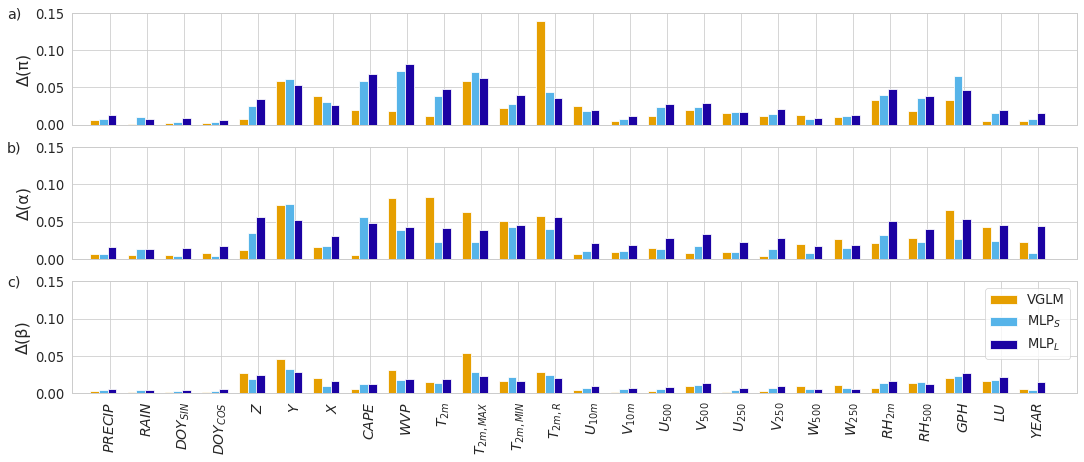

In [15]:
# k = '1'

import seaborn as sns
sns.set_style('whitegrid')
# paper style
sns.set_context("paper", font_scale=1.5)

fig, axes = plt.subplots(3,1,figsize=(18,7))
for idx, (k, label, flag, l) in enumerate(zip(['0','1','2'],[pi, alpha, beta],[False, False, True],['a)','b)','c)'])):
    
    plot_multiple_bars([abs(importance['VGLM_[]_bgmm_B=32_D=0_RN=0']['k_all'][k]),
                        abs(importance['MLP_[10]_bgmm_B=32_D=0_RN=0']['k_all'][k]),
                        abs(importance['MLP_[50, 50]_bgmm_B=32_D=0_RN=0']['k_all'][k]),
                        ], CONFIG.predictors, 
                       legend_items=['VGLM','$\mathrm{MLP}_S$','$\mathrm{MLP}_L$','RNN [10]','RNN [50,50]'], 
                       title=label, plot_x_labels=flag, label=l, ax=axes[idx])
plt.savefig('figures/importances.png', dpi=400)    
plt.show()